In [2]:
from eppy import modeleditor
from eppy.modeleditor import IDF

import pandas as pd
import seaborn as sns


In [3]:
def idfToPandas(idf, idfObjType):
    idfObjs = []
    for object in idf.idfobjects[idfObjType]:
        objSeries = pd.Series()
        for objls in object.objls:
            if object[objls] != "":
                objSeries[objls] = object[objls]
        idfObjs.append(objSeries)
    return pd.DataFrame(idfObjs).set_index("Name")

In [4]:
iddfile = "V8-5-0-Energy+.idd"
fname1 = "ASHRAE_2005_HOF_Materials.idf"

IDF.setiddname(iddfile)
idf1 = IDF(fname1)

In [8]:
materials = idfToPandas(idf1, "MATERIAL")
matrialsAirGap = idfToPandas(idf1, "MATERIAL:AIRGAP")
materials = pd.concat([materials, matrialsAirGap])
materials.to_csv("ASHRAE_2005_HOF_Materials.csv")

<Axes: xlabel='Conductivity', ylabel='Specific_Heat'>

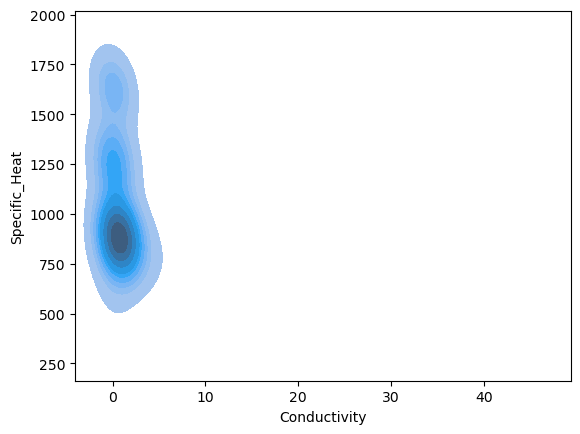

In [9]:
sns.kdeplot(data=materials, x="Conductivity", y="Specific_Heat", fill=True)


In [14]:
constructions = idfToPandas(idf1, "CONSTRUCTION")
constructions.to_csv("ASHRAE_2005_HOF_Constructions.csv")
constructions

,key,Outside_Layer,Layer_2,Layer_3,Layer_4,Layer_5
Name,,,,,,
Light Exterior Wall,Construction,F08 Metal surface,I02 50mm insulation board,F04 Wall air space resistance,G01a 19mm gypsum board,NaN
Light Roof/Ceiling,Construction,M11 100mm lightweight concrete,F05 Ceiling air space resistance,F16 Acoustic tile,NaN,NaN
Light Partitions,Construction,G01a 19mm gypsum board,F04 Wall air space resistance,G01a 19mm gypsum board,NaN,NaN
Light Floor,Construction,F16 Acoustic tile,F05 Ceiling air space resistance,M11 100mm lightweight concrete,NaN,NaN
Light Furnishings,Construction,G05 25mm wood,NaN,NaN,NaN,NaN
Medium Exterior Wall,Construction,M01 100mm brick,I02 50mm insulation board,F04 Wall air space resistance,G01a 19mm gypsum board,NaN
Medium Roof/Ceiling,Construction,M14a 100mm heavyweight concrete,F05 Ceiling air space resistance,F16 Acoustic tile,NaN,NaN
Medium Partitions,Construction,G01a 19mm gypsum board,F04 Wall air space resistance,G01a 19mm gypsum board,NaN,NaN
Medium Floor,Construction,F16 Acoustic tile,F05 Ceiling air space resistance,M14a 100mm heavyweight concrete,NaN,NaN
